# 001 - Python Fundamentals
## Introduction to Python

Summary/Descriptive stats
In this session we look to explore our data using summary statistics.

#### Terry McCann | @SQLShark | tpm@adatis.co.uk

### What tools am I using? 

|Tool|Detail|
|----|------|
|Jupyter Notebooks | Interactive code and markdown -IPython. Works with R too. http://jupyter.org/|
|Anaconda distribution | Set of tools for data science with Python. https://www.continuum.io/ |
|Python | Programming language. Has many uses, one being data science. https://www.python.org/ |
|Numpy| NumPy is the fundamental package for scientific computing with Python. http://www.numpy.org/ |
|Pandas| pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python. http://pandas.pydata.org/ |
|Matplotlib| matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. http://matplotlib.org/ |
|others (seaborn,scipy)||

### What are summary statistics? 
"The information that gives a quick and simple description of the data. Can include mean, median, mode, minimum value, maximum value, range, standard deviation, etc."

Commonly known as descriptive statistics

#### What will we look at? 
- The basics of summary statistics
    - Measures of central tendency
- Measures of spread
    - Standard deviation
- Visualisation
    - Histograms
    - Box plots

#### Let's get started with some sample data:

#### Import our required libaries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

## Variables 

Python variable are defined as so:

In [2]:
a = 10

In [36]:
print(a)

10


In [37]:
b = 45

In [38]:
print(b)

45


In [39]:
c = a + b
print(c)

55


### Measures of central tendency

##### Load a List

In [1]:
x = [10,10,8,6,2,6,2,3,6,8,4,2,2,2,2,4,2,2,2,6,50,8,10,10,8,-50]

##### Mean
Add all numbers together, divide by numbers: 
** Sensitive to outliers **

$ \frac{\sum x}{n}$

In [2]:
np.sum(x)

NameError: name 'np' is not defined

In [9]:
len(x)

25

In [10]:
np.mean(x)

7.0

##### Median 
The middle number when sorted for ODD numbers. For Even divide the 2 middles. **Less sensitive to outliers**

In [11]:
np.sort(x)

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  4,  4,  6,  6,  6,  6,  8,
        8,  8,  8, 10, 10, 10, 10, 50])

In [12]:
np.median(x)

6.0

##### Mode 
The most frequent appearing number

In [13]:
sts.mode(x, axis=None)

ModeResult(mode=array([2]), count=array([9]))

#### Standard deviation
What is standard deviation? It is a measure of variance. 

Standard Deviation is just the square root of Variance. Variance is the distance from the mean squared, divied by the length.

Numpy has a function for standard deviation:

In [14]:
np.std(x)

9.277930803794561

To prove it this can be calculated manually

In [15]:
np.mean(x)

7.0

Variance from the mean squared.

In [16]:
(x - np.mean(x))**2

array([9.000e+00, 9.000e+00, 1.000e+00, 1.000e+00, 2.500e+01, 1.000e+00,
       2.500e+01, 1.600e+01, 1.000e+00, 1.000e+00, 9.000e+00, 2.500e+01,
       2.500e+01, 2.500e+01, 2.500e+01, 9.000e+00, 2.500e+01, 2.500e+01,
       2.500e+01, 1.000e+00, 1.849e+03, 1.000e+00, 9.000e+00, 9.000e+00,
       1.000e+00])

Sum of variance squared divided by length

In [17]:
sum((x - np.mean(x))**2)/len(x)

86.08

Square root the above

In [18]:
import math

math.sqrt(sum((x - np.mean(x))**2)/len(x))

9.277930803794561

In [19]:
np.std(x)

9.277930803794561

#### Detecting outliers
What is an outlier? 

2 standard deviations from the mean (old method). 
IQR? 

There are others. Good discussion here: http://stats.stackexchange.com/questions/175999/determine-outliers-using-iqr-or-standard-deviation

In [20]:
np.mean(x) + (np.std(x)*2)

25.555861607589122

Any value higher than 25.5 is an outlier. 

### How can we begin to look at each of these in more depth? 
While this is good. The process is slow. To speed up our understanding and profiling we can use some visuals. 

#### Load Titanic dataset
This will read the titanic dataset which is avaiabile from the Kaggle website.
The data will be read using Panda read_csv function. 

https://www.kaggle.com/c/titanic/data?train.csv

This will create a pandas dataframe.

In [21]:
titanic = pd.read_csv('./input/train.csv')

Let's take a quick look at the top few rows. 

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
np.mean(titanic.Age.dropna())

29.69911764705882

In [24]:
np.median(titanic.Age.dropna())

28.0

In [25]:
np.max(titanic.Age.dropna())

80.0

In [26]:
np.min(titanic.Age.dropna())

0.42

Doing this manually is one way. Or you can use describe()
http://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html

In [27]:
titanic.describe()

C:\Users\tpm\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualisations
#### Histograms and box plots

Let's now create a histogram of the titanic customer's age.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

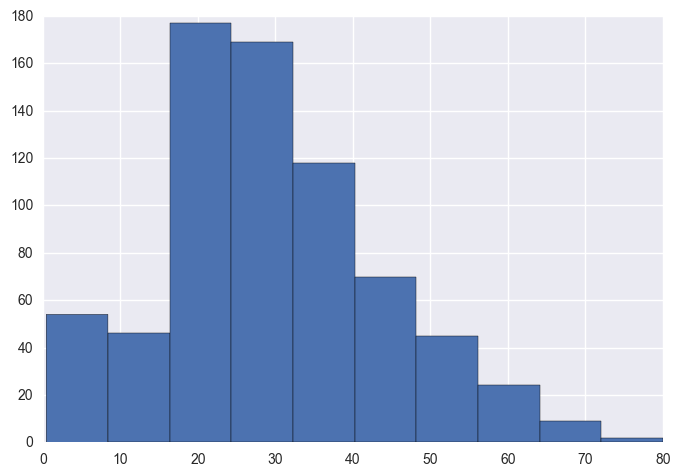

In [28]:
plt.hist(titanic.Age.dropna())

We can add additional bins with bins=n to increase and decrease the bin size. 

(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

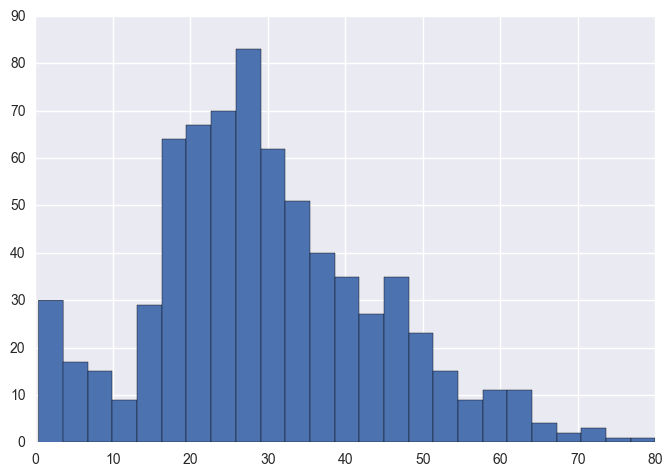

In [29]:
plt.hist(titanic.Age.dropna(), bins=25)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

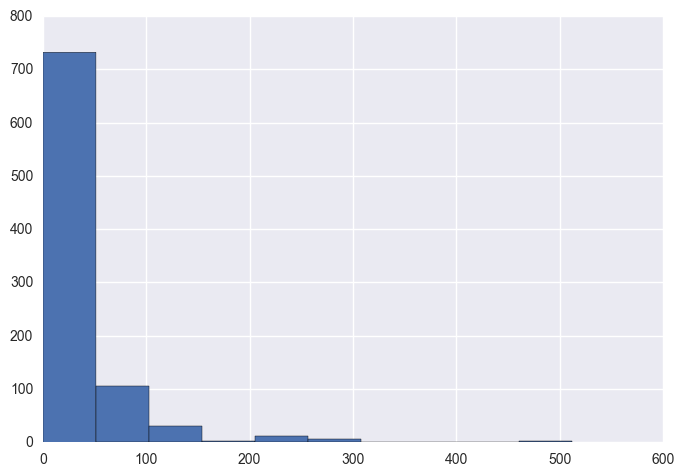

In [30]:
plt.hist(titanic.Fare.dropna())

# Box plots
We will start to look at the shape of our data using a box plot. 

In [31]:
from IPython.core.display import display, HTML
display(HTML('<iframe src=http://www.physics.csbsju.edu/stats/simple.box.defs.gif width=400 height=400></iframe>'))

Lets look at the ages of the titanic passengers on a box plot. 

C:\Users\tpm\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


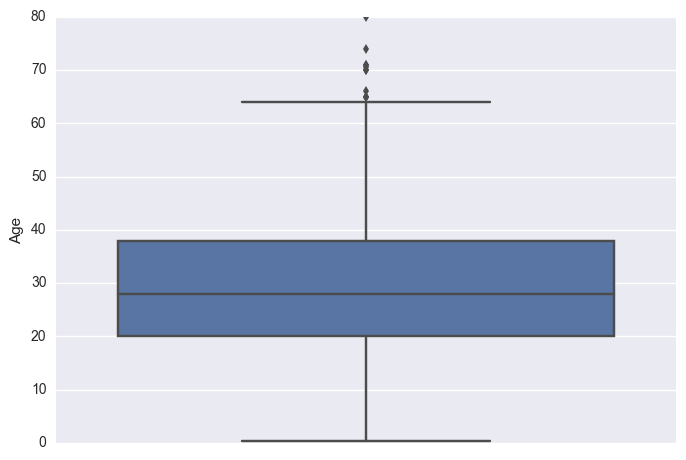

In [32]:
sns.boxplot(titanic.Age.dropna(), vert=True)

Why is the maximum on this chart not 80? 

There are outliers. Outliers are calculater as anything outside 1.5 x the Inter quartile range. 

IQR is the blue box. 20 - 38. IQR = 38 - 20 = 18. 18 * 1.5 = 27. 
38 + 27 = 65. 
Anything above ~65 is an outlier. 

Lets look at the age of passengers by their sex.

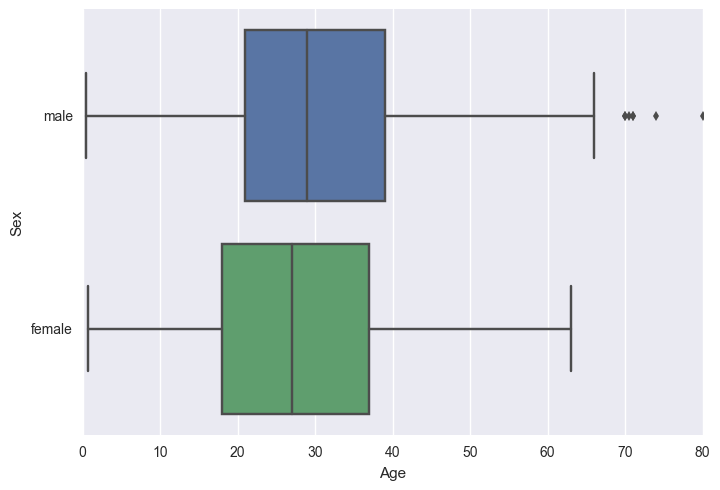

In [33]:
sns.boxplot(titanic.Age.dropna(), titanic.Sex)

What we can see here is that women onboard the Titanic on average were younger than men.  

### Of the survivors what were the ages of those who survived? 

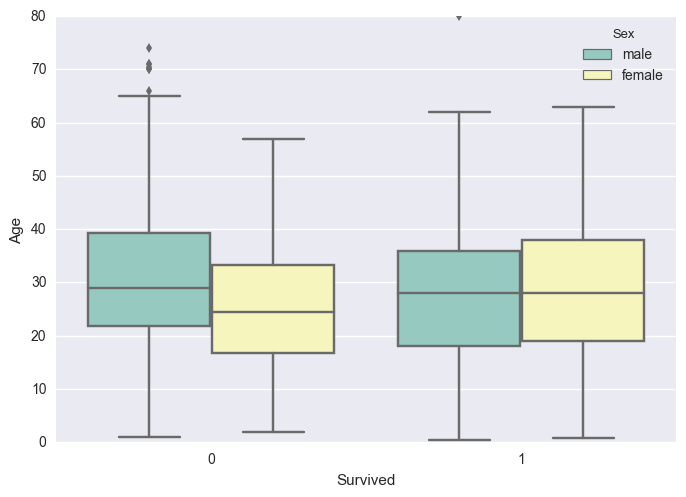

In [34]:
sns.boxplot(x="Survived", y="Age", hue="Sex", data=titanic, palette="Set3")

How to contol boxplots:
http://seaborn.pydata.org/generated/seaborn.boxplot.html

#### How much did each class of people pay? 
Expectation = First-class will have paid more than Second or Third. 

We can achieve this analysis with another box plot. 

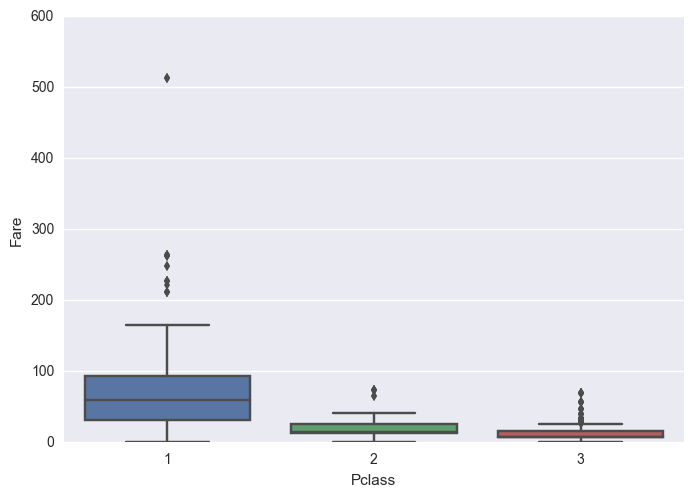

In [35]:
sns.boxplot(titanic.Pclass, titanic.Fare.dropna())

### In summary

We looked at descriptive statistics using numpy, pandas and matpoltlib. 

Visualising descriptive statistics is a great way to speed up understanding.